### Neural Network

In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load the data from pickle files

In [2]:
# Dataframe
with open('../Pickles/Content_Parsed.pickle', 'rb') as data:
    content_parsed = pickle.load(data)

# features_train
with open('../Pickles/features_train.pickle', 'rb') as data:
    features_train = pickle.load(data)

# labels_train
with open('../Pickles/labels_train.pickle', 'rb') as data:
    labels_train = pickle.load(data)

# features_test
with open('../Pickles/features_test.pickle', 'rb') as data:
    features_test = pickle.load(data)

# labels_test
with open('../Pickles/labels_test.pickle', 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
#Create a MLP Classifier
clf = MLPClassifier()

#Train the model using the training sets
clf.fit(features_train, labels_train)

#Predict the response for test dataset
labels_pred = clf.predict(features_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [4]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(labels_test, labels_pred))

Accuracy: 0.8194029850746268


In [5]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(labels_test, labels_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(labels_test, labels_pred, average='micro'))

Precision: 0.8194029850746268
Recall: 0.8194029850746268


### Hyperparameters
We will try to improve the accuracy using hyperparameters tuning

In [6]:
nn_0 = MLPClassifier()
print('Parameters currently in use:\n')
nn_0.get_params()

Parameters currently in use:



{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## We'll tune the following hyperparameter:

* hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
* solver: this represents the weight optimization.
* alpha: L2 penalty (regularization term) parameter.
* learning_rate: Learning rate schedule for weight updates.
* max_iter: Maximum number of iterations.

### We will use 2 techniques:
* GridSearchCV
* RandomizedSearchCV

### GridSearchCV technique
This technique attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator.

In [19]:
# Create the parameter grid 
hidden_layer_sizes = (5, 2)
solver = ['lbfgs', 'sgd', 'adam']
alpha = [.0001, .001, .01, .1, 1, 10, 100]
learning_rate = ['constant', 'invscaling', 'adaptive']
max_iter = [1000]

param_grid = {'hidden_layer_sizes': hidden_layer_sizes,
              'solver': solver,
              'alpha': alpha,
              'learning_rate': learning_rate,
              'max_iter': max_iter}

param_grid

{'hidden_layer_sizes': (5, 2),
 'solver': ['lbfgs', 'sgd', 'adam'],
 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'learning_rate': ['constant', 'invscaling', 'adaptive'],
 'max_iter': [1000]}

In [8]:
# Create a base model
nnc = MLPClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 3)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=nnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarnin

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, 

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=3, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'hidden_layer_sizes': (5, 2),
                         'learning_rate': ['constant', 'invscaling',
      

In [9]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'alpha': 0.1, 'hidden_layer_sizes': 5, 'learning_rate': 'invscaling', 'max_iter': 1000, 'solver': 'adam'}

The mean accuracy of a model with these hyperparameters is:
0.7380593262946205


### Randomized Search cross validation

In [10]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=nnc,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=3)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarnin

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'

In [11]:
print("The best hyperparameters from Grid Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Grid Search are:
{'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'invscaling', 'hidden_layer_sizes': 5, 'alpha': 0.1}

The mean accuracy of a model with these hyperparameters is:
0.7409068261086199


In [14]:
best_nnc_model = random_search.best_estimator_
best_nnc_model

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Fitting the model and predicting

In [15]:
# Fitting the model
best_nnc_model.fit(features_train, labels_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [16]:
# Predicting the values
nnc_pred = best_nnc_model.predict(features_test)

In [17]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_nnc_model.predict(features_train)))

The training accuracy is: 
0.8395615346287992


In [18]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, nnc_pred))

The test accuracy is: 
0.753731343283582


In [20]:
# Classification report
print("Classification report")
print(classification_report(labels_test, nnc_pred))

Classification report
              precision    recall  f1-score   support

           1       0.57      0.08      0.14        50
           2       0.85      0.59      0.70        39
           3       0.64      0.60      0.62        75
           4       0.79      0.69      0.74        81
           5       0.75      0.92      0.83       387
           6       0.94      0.70      0.80        23
           7       0.00      0.00      0.00         2
           8       0.86      0.46      0.60        13

    accuracy                           0.75       670
   macro avg       0.68      0.50      0.55       670
weighted avg       0.74      0.75      0.73       670



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
content_parsed.Category

0       1
1       5
2       5
3       5
4       5
       ..
2672    3
2673    5
2674    5
2675    5
2676    1
Name: Category, Length: 2677, dtype: object

In [22]:
#aux_df = content_parsed['Category'].drop_duplicates().sort_values
conf_matrix = confusion_matrix(labels_test, nnc_pred)
conf_matrix

array([[  4,   2,   2,   3,  39,   0,   0,   0],
       [  0,  23,   0,   0,  16,   0,   0,   0],
       [  1,   0,  45,   3,  26,   0,   0,   0],
       [  0,   0,   6,  56,  19,   0,   0,   0],
       [  2,   2,  17,   9, 355,   1,   0,   1],
       [  0,   0,   0,   0,   7,  16,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   7,   0,   0,   6]])

In [23]:
category_codes = {'1' : 'Service Proxy troubleshooting / APIGW', 
          '2' : 'Onboarding generic queries',
          '3' : 'Assessment/rescore queries/early spec/exception requests',
          '4' : 'Access to Tool queries', 
          '5' : 'API Standards queries',
         # 'Redirecting queries to other teams' : '9', 
         # 'Redirect to us' : '10', 
          '6' : 'zally',
          '7' : 'Client libs', 
          '8' : 'Jamstack content reviewer'}
# Passing the categories was a mess so created another df specifically for categories
df2 = pd.DataFrame({})
df2["Category"] = content_parsed["Category"]
df2["Category_code"] = content_parsed["Category"]
df2 = df2.replace({'Category_code':category_codes})
label = df2.sort_values(by=['Category']).drop_duplicates()
label

,Category,Category_code
0,1,Service Proxy troubleshooting / APIGW
357,2,Onboarding generic queries
992,3,Assessment/rescore queries/early spec/exceptio...
1192,4,Access to Tool queries
402,5,API Standards queries
1010,6,zally
636,7,Client libs
679,8,Jamstack content reviewer


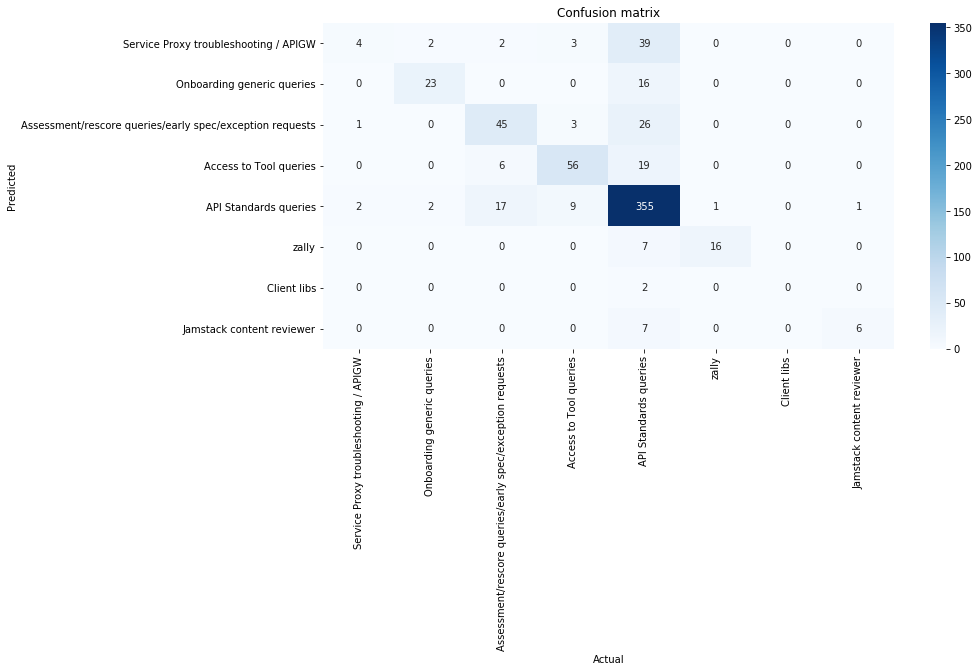

In [24]:
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=label.Category_code, 
            yticklabels=label.Category_code,
            fmt='g',
            cmap="Blues"
            )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [25]:
# We'll create a dataset with a model summary to compare models:
d = {
     'Model': 'MLP-NN',
     'Training Set Accuracy': accuracy_score(labels_train, best_nnc_model.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, nnc_pred)
}

df_models_nnc = pd.DataFrame(d, index=[0])

In [27]:
df_models_nnc

,Model,Training Set Accuracy,Test Set Accuracy
0,MLP-NN,0.839562,0.753731


In [28]:
with open('Models/best_nnc.pickle', 'wb') as output:
    pickle.dump(best_nnc_model, output)
    
with open('Models/df_models_nnc.pickle', 'wb') as output:
    pickle.dump(df_models_nnc, output)